In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\User1\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
data = pd.read_csv("2019.csv")
data.head(10)




,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [3]:
del data['Overall rank']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [5]:
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)

data_non_numeric = data.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values
print(non_numeric_cols)




['Score' 'GDP per capita' 'Social support' 'Healthy life expectancy'
 'Freedom to make life choices' 'Generosity' 'Perceptions of corruption']
['Country or region']


In [6]:
cols = data.columns[:157]
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
  
    
    

Country or region - 0%
Score - 0%
GDP per capita - 0%
Social support - 0%
Healthy life expectancy - 0%
Freedom to make life choices - 0%
Generosity - 0%
Perceptions of corruption - 0%


In [7]:
data.describe() 



,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Предварительный анализ данных(EDA)

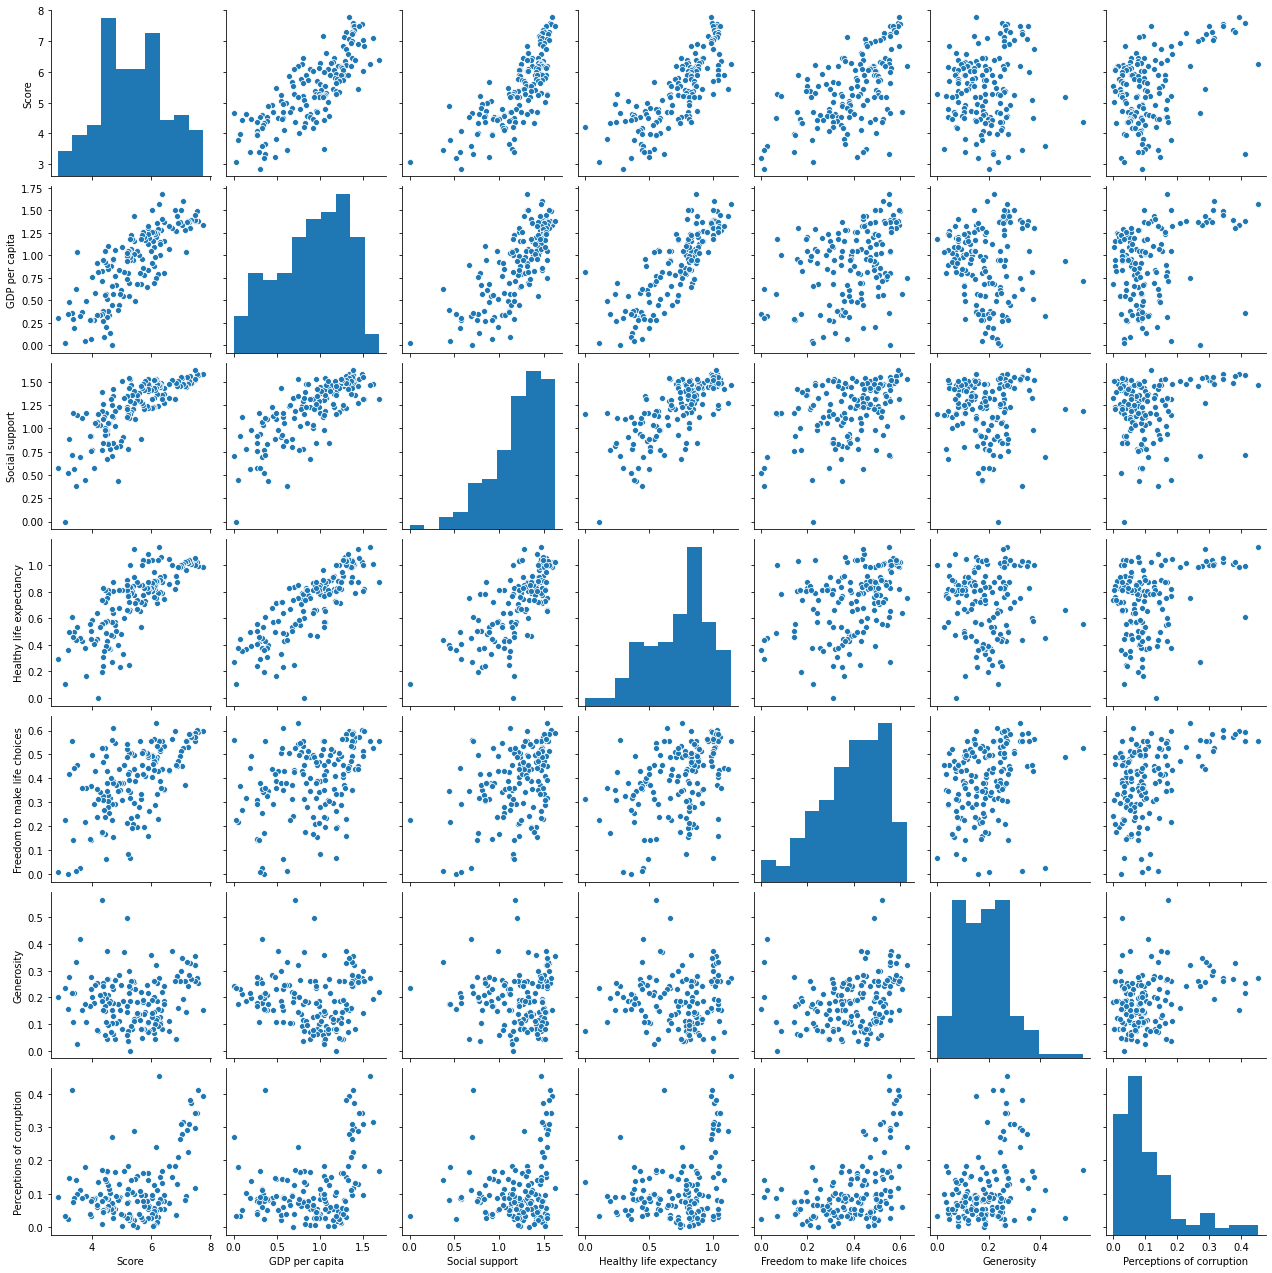

In [8]:
import seaborn as sns
sns.pairplot(data)




<AxesSubplot:>

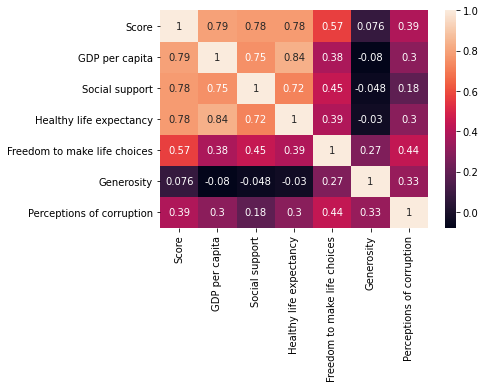

In [9]:
sns.heatmap(data.corr(), annot=True)

### Данные для обучения и тестовые данные


In [10]:
data.drop(['Freedom to make life choices', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)
data.head(10)



,Country or region,Score,GDP per capita,Social support,Healthy life expectancy
0,Finland,7.769,1.340,1.587,0.986
1,Denmark,7.600,1.383,1.573,0.996
2,Norway,7.554,1.488,1.582,1.028
3,Iceland,7.494,1.380,1.624,1.026
4,Netherlands,7.488,1.396,1.522,0.999
5,Switzerland,7.480,1.452,1.526,1.052
6,Sweden,7.343,1.387,1.487,1.009
7,New Zealand,7.307,1.303,1.557,1.026
8,Canada,7.278,1.365,1.505,1.039
9,Austria,7.246,1.376,1.475,1.016


In [11]:
main_column = ['Score'] 
other = ['Country or region']
predictors = list(set(list(data.columns))-set(main_column)- set(other))
data[predictors] = data[predictors]/data[predictors].max()
data.describe()




,Score,GDP per capita,Social support,Healthy life expectancy
count,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.537498,0.744344,0.635621
std,1.113120,0.236573,0.184231,0.212203
min,2.853000,0.000000,0.000000,0.000000
25%,4.544500,0.357928,0.650092,0.480061
50%,5.379500,0.570071,0.782943,0.691499
75%,6.184500,0.731888,0.894397,0.772787
max,7.769000,1.000000,1.000000,1.000000


In [12]:
from sklearn.model_selection import train_test_split
x = data[predictors].values
y = data[main_column].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=35)
print(x_train.shape); print(x_test.shape)




(78, 3)
(78, 3)


### Lasso

In [13]:
lasso = Lasso(alpha=0.02)
lasso.fit(x_train, y_train) 
pred_train_l= lasso.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_l)))
print(r2_score(y_train, pred_train_l))

pred_test_l= lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_l))) 
print(r2_score(y_test, pred_test_l))




0.5810979700351392
0.7586479119570875
0.5946753142586193
0.6673423670385052


### Ridge

In [14]:
ridgee = Ridge(alpha=0.02)
ridgee.fit(x_train, y_train) 
pred_train_r= ridgee.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_r)))
print(r2_score(y_train, pred_train_r))

pred_test_r= ridgee.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_r))) 
print(r2_score(y_test, pred_test_r))




0.5717225023510283
0.7663730627471502
0.5988559082472
0.662648730590103


### ElasticNet

In [15]:
model_enet = ElasticNet(alpha = 0.02)
model_enet.fit(x_train, y_train) 
pred_train= model_enet.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
print(r2_score(y_train, pred_train))

pred_test= model_enet.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test)))
print(r2_score(y_test, pred_test))




0.5881877913914692
0.7527226398762364
0.5932841895283181
0.6688969194864023


In [19]:
from sklearn.ensemble import StackingRegressor
def show(model):
    pred_train = model.predict(x_train)
    r = model.score(x_train, y_train)
    print('train_r2:', r)
    pred_test = model.predict(x_test)
    r = model.score(x_test, y_test)
    print('test_r2:', r)

In [25]:
from sklearn.ensemble import StackingRegressor
def show(model):
    pred_train = model.predict(x_train)
    r = model.score(x_train, y_train)
    print('train_r2:', r)
    pred_test = model.predict(x_test)
    r = model.score(x_test, y_test)
    print('test_r2:', r)
models = [('lasso', Lasso()),
        ('ridge', Ridge()),
        ('easticNet',ElasticNet())]
mod = StackingRegressor(estimators = models)
model_new = mod.fit(x_train, y_train)
show(model_new)

train_r2: 0.7629192502587769
test_r2: 0.6702946916459269


D:\Users\User1\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
